In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("dataset/babies.csv")

In [4]:
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [6]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [7]:
df.shape

(1236, 8)

In [8]:
##finding the missing value
df.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [9]:
##removiung the missing value
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [11]:
##check duplicate values

df.duplicated().sum()

np.int64(0)

In [12]:
import matplotlib.pyplot as plt

In [13]:
df.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

In [14]:
df.drop(columns=['case'],inplace=True)

In [15]:
df.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

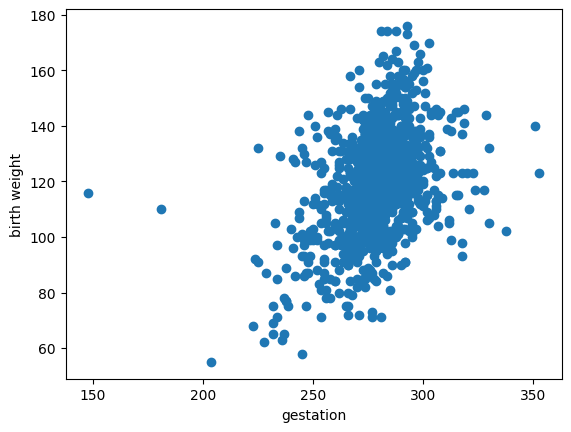

In [16]:
#check relation of weight bwt with others variable

plt.scatter(df['gestation'],df['bwt'])
plt.xlabel("gestation")
plt.ylabel("birth weight")
plt.show()

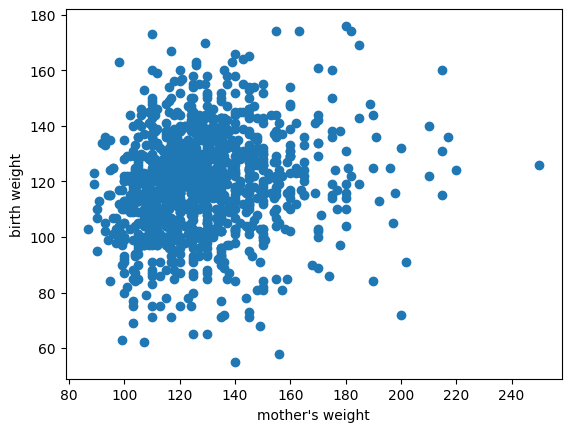

In [17]:
plt.scatter(df['weight'],df['bwt'])
plt.xlabel("mother's weight")
plt.ylabel("birth weight")
plt.show()

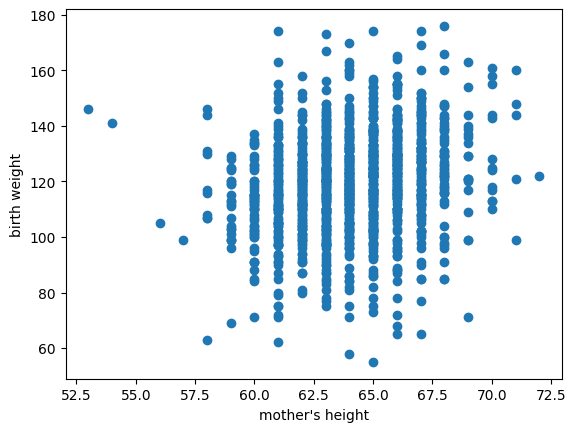

In [18]:
plt.scatter(df['height'],df['bwt'])
plt.xlabel("mother's height")
plt.ylabel("birth weight")
plt.show()

In [19]:
df.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

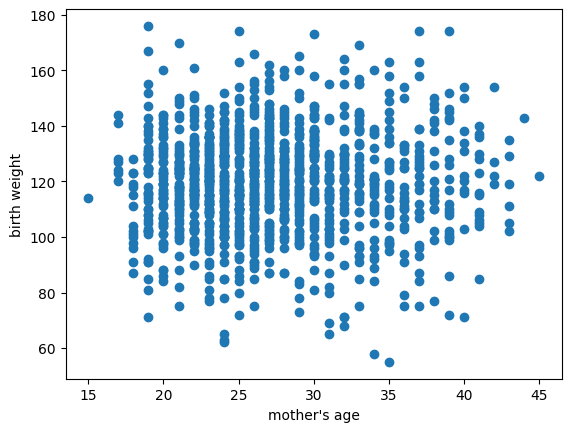

In [20]:
plt.scatter(df['age'],df['bwt'])
plt.xlabel("mother's age")
plt.ylabel("birth weight")
plt.show()

In [21]:
df['smoke'].value_counts()

smoke
0.0    715
1.0    459
Name: count, dtype: int64

In [22]:
df['smoke'].value_counts(normalize=True)*100

smoke
0.0    60.902896
1.0    39.097104
Name: proportion, dtype: float64

In [23]:
df['parity'].unique()

array([0, 1])

In [24]:
df['parity'].value_counts()

parity
0    866
1    308
Name: count, dtype: int64

In [25]:
df['parity'].value_counts(normalize=True)*100 #check percentage

parity
0    73.764906
1    26.235094
Name: proportion, dtype: float64

In [26]:
##correlation matrix

df.corr()              #tells relationship
#bwt has relation with gestation ,height,weight
#we neglect parity age and smoke due to low value

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407543,-0.043908,0.026983,0.203704,0.155923,-0.246800
gestation,0.407543,1.000000,0.080916,-0.053425,0.070470,0.023655,-0.060267
parity,-0.043908,0.080916,1.000000,-0.351041,0.043543,-0.096362,-0.009599
age,0.026983,-0.053425,-0.351041,1.000000,-0.006453,0.147322,-0.067772
height,0.203704,0.070470,0.043543,-0.006453,1.000000,0.435287,0.017507
weight,0.155923,0.023655,-0.096362,0.147322,0.435287,1.000000,-0.060281
smoke,-0.246800,-0.060267,-0.009599,-0.067772,0.017507,-0.060281,1.000000


In [32]:
##splitting dataset into x and y
y=df['bwt']       #target varibale or dependent varibale
y


0       120
1       113
2       128
4       108
5       136
       ... 
1231    113
1232    128
1233    130
1234    125
1235    117
Name: bwt, Length: 1174, dtype: int64

In [31]:
x=df.iloc[:,1:]


In [29]:
x

,gestation,parity,age,height,weight,smoke
0,284.0,0,27.0,62.0,100.0,0.0
1,282.0,0,33.0,64.0,135.0,0.0
2,279.0,0,28.0,64.0,115.0,1.0
4,282.0,0,23.0,67.0,125.0,1.0
5,286.0,0,25.0,62.0,93.0,0.0
...,...,...,...,...,...,...
1231,275.0,1,27.0,60.0,100.0,0.0
1232,265.0,0,24.0,67.0,120.0,0.0
1233,291.0,0,30.0,65.0,150.0,1.0
1234,281.0,1,21.0,65.0,110.0,0.0


In [33]:
##train test split
##command <pip install scikit-learn>

from sklearn.model_selection import train_test_split as tts



In [ ]:
x_train, x_test, y_train, y_test=tts(x,y,test_size=0.20)  #0.20 means 20 percentage

In [35]:
x_train.shape

(939, 6)

In [36]:
x_test.shape

(235, 6)

In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge  #using ml model


In [ ]:
#three models
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()

In [ ]:
#trainning
lr.fit(x_train,y_train)
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [41]:
#predict
lr_pred=lr.predict(x_test)
las_pred=lasso.predict(x_test)
rid_pred=ridge.predict(x_test)

In [43]:
#model evaluation

from sklearn.metrics import r2_score,mean_squared_error

In [48]:
lr_score=r2_score(y_test,lr_pred)
las_score=r2_score(y_test,las_pred)
rid_score=r2_score(y_test,rid_pred)

In [49]:
lr_mse=mean_squared_error(y_test,lr_pred)
las_mse=mean_squared_error(y_test,las_pred)
rid_mse=mean_squared_error(y_test,rid_pred)

In [50]:
print("\n Performance of Linear Regression Model")
print("R2 Score: ", lr_score)
print("MSE:",lr_mse)


print("\n Performance of Lasso model")
print("R2 Score: ", las_score)
print("MSE:",las_mse)


print("\n Performance of Ridge Model")
print("R2 Score: ", rid_score)
print("MSE:",rid_mse)




 Performance of Linear Regression Model
R2 Score:  0.24065152030310066
MSE: 245.402646021048

 Performance of Lasso model
R2 Score:  0.19803722579938177
MSE: 259.1745319326483

 Performance of Ridge Model
R2 Score:  0.24041240790399054
MSE: 245.47992123395355


In [ ]:
##selected model is linear regression

In [51]:
import pickle

with open("model/model.pkl",'wb') as f:
    pickle.dump(lr,f)                #model to a write binary mode
    

In [52]:
##load the pickel file

with open("model/model.pkl",'rb') as obj:
    mymodel=pickle.load(obj)

In [54]:
x_train.head()

,gestation,parity,age,height,weight,smoke
78,277.0,0,27.0,63.0,126.0,0.0
687,277.0,0,34.0,66.0,140.0,0.0
704,259.0,0,38.0,64.0,128.0,0.0
959,296.0,1,19.0,67.0,124.0,0.0
111,302.0,0,28.0,65.0,125.0,0.0


In [ ]:
test_data={
    "gestation" :[277.0],
    "parity":[0],
    "age"  :[27.0],
    "height" :[63.0],
    "weight" :[126.0],
    "smoke" :[0.0]
}




In [56]:
test_df=pd.DataFrame(test_data)

In [57]:
test_df

,gestation,parity,age,height,weight,smoke
0,277.0,0,27.0,63.0,126.0,0.0


In [58]:
mymodel.predict(test_df)

array([120.34398951])